# Python Image Processing & Computer Vision Tutorial

## Setup & Installation

Run this cell first to install dependencies:


In [1]:
# !pip install torch torchvision pillow matplotlib opencv-python

## Import Libraries


In [2]:
import numpy as np
import torch
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

# Set consistent random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

## Load Image

lenna: https://en.wikipedia.org/wiki/Lenna#/media/File:Lenna_(test_image).png


In [3]:
ROOT = Path().resolve()
print(f"Working directory: {ROOT}")

image_path = ROOT / "images" / "lenna.png"
if not image_path.exists():
    raise FileNotFoundError(f"Image not found at {image_path.absolute()}")
print(f"Image path: {image_path}")

pil_image = Image.open(image_path)
np_image = np.array(pil_image)

print(f"Image shape: {np_image.shape} (HxWxC)")
print(f"Data type: {np_image.dtype}")
print(f"Value range: {np_image.min()}-{np_image.max()}")

Working directory: /Users/luca/Documents/GitRepos/dlo/tutorials
Image path: /Users/luca/Documents/GitRepos/dlo/tutorials/images/lenna.png
Image shape: (512, 512, 3) (HxWxC)
Data type: uint8
Value range: 3-255


## Display Image


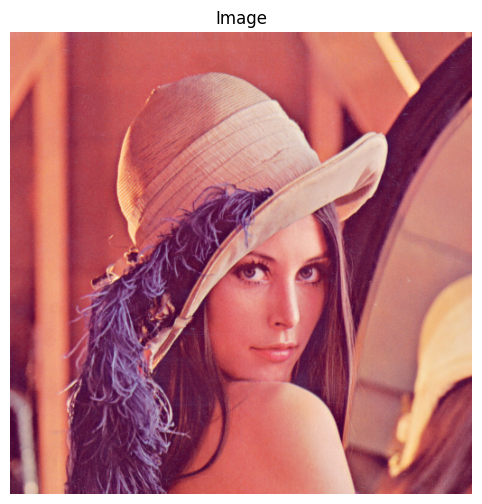

In [4]:
plt.figure(figsize=(10, 6))
plt.imshow(np_image)
plt.title("Image")
plt.axis("off")
plt.show()

## Convert Image to Grayscale


In [5]:
# Mean across RGB channels
gray_image = np_image.mean(axis=2).astype(np.uint8)

## Show Grayscale Images


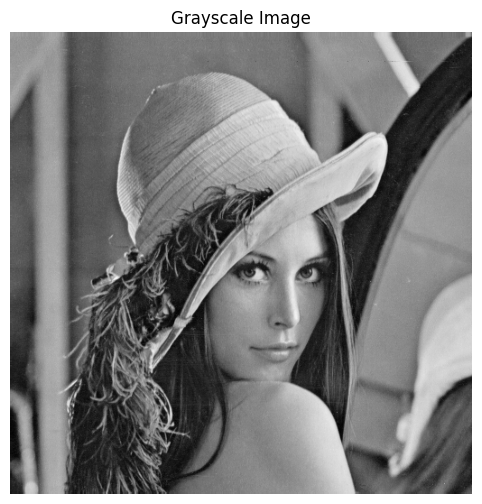

In [6]:
plt.figure(figsize=(10, 6))
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

## PyTorch Image Loading & Preprocessing


### Define transformations


In [7]:
from torchvision import transforms

transform_pipeline = transforms.Compose(
    [
        # Resize to fixed size (height, width)
        transforms.Resize((128, 128)),
        # Image to grayscale (only one channel)
        transforms.Grayscale(),
        # Convert image to PyTorch tensor (C x H x W)
        transforms.ToTensor(),
    ]
)

### Apply transformations


In [8]:
transformed_tensor = transform_pipeline(pil_image)

print("\nTransformed Tensor Info:")
print(f"Shape: {transformed_tensor.shape} (CxHxW)")
print(f"Data type: {transformed_tensor.dtype}")
print(
    f"Value range: {transformed_tensor.min().item():.2f}–{transformed_tensor.max().item():.2f}"
)


Transformed Tensor Info:
Shape: torch.Size([1, 128, 128]) (CxHxW)
Data type: torch.float32
Value range: 0.12–0.89


### Visualize Transformed Tensor


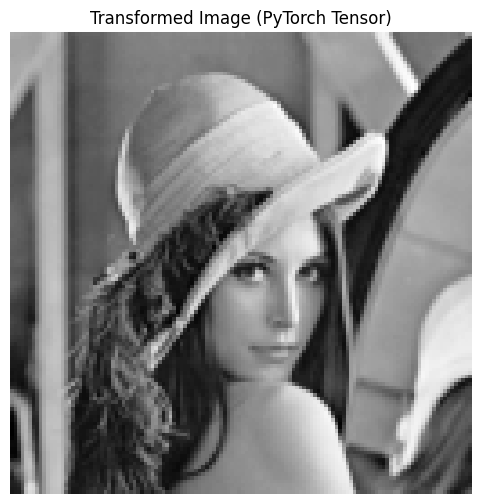

In [9]:
# Convert tensor back to numpy for visualization
# Change from CxHxW to HxWxC
display_image = transformed_tensor.permute(1, 2, 0).numpy()

plt.figure(figsize=(10, 6))
plt.imshow(display_image, cmap="gray")
plt.title("Transformed Image (PyTorch Tensor)")
plt.axis("off")
plt.show()

### Use ImageFolder to load data

cat:
https://commons.wikimedia.org/wiki/File:Tabby_cat_with_blue_eyes-3336579.jpg

dog:
https://commons.wikimedia.org/wiki/File:Labrador_czekoladowy.jpg


In [10]:
from torchvision import datasets

# Initialize dataset
dataset = datasets.ImageFolder(
    root=ROOT / "images",
    transform=transform_pipeline,
)

# Metadata
print(f"Class names: {dataset.classes}")
print(f"Class-to-index mapping: {dataset.class_to_idx}")

Class names: ['cats', 'dogs']
Class-to-index mapping: {'cats': 0, 'dogs': 1}


In [11]:
# Get first image and label
image, label = dataset[0]
# Print shape (CxHxW)
print(f"Image shape: {image.shape}")
# Print label (0: cats, 1: dogs)
print(f"Label: {label}")

Image shape: torch.Size([1, 128, 128])
Label: 0


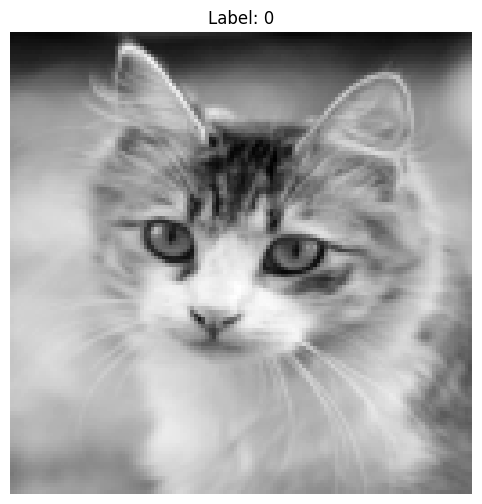

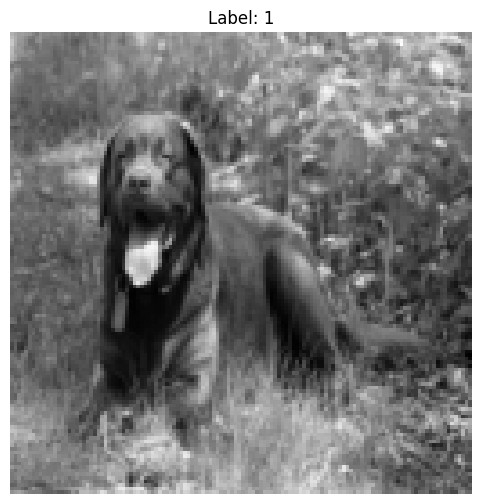

In [12]:
for i in range(len(dataset)):
    image, label = dataset[i]

    plt.figure(figsize=(10, 6))
    plt.imshow(image.permute(1, 2, 0).numpy(), cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()